<a href="https://colab.research.google.com/github/xesmaze/cpsc499-sta-fall2024/blob/main/ModelingSpatialVariability_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Part 1 of the *Modeling Spatial Variability* Series we will start with developing **semivariograms**

This notebook demonstrates how to compute a **semivariogram** manually in Python, using only `numpy` and `matplotlib`.  

We'll:
1. Generate synthetic spatial data (x, y, z)
2. Compute pairwise distances and semivariances
3. Bin them by lag distance
4. Plot the empirical semivariogram

**Step 1.** Lets start with generating a small spatial dataset: We will generate data points in a 2D grid and assign simulated values(attributes) to them.

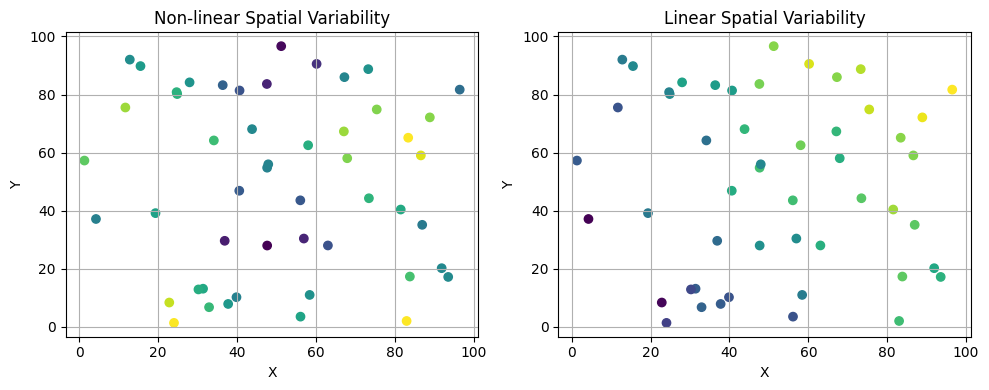

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate coordinates (x, y)
np.random.seed(61822)
n_points = 50
x = np.random.uniform(0, 100, n_points)
y = np.random.uniform(0, 100, n_points)

# For attributes that are spatially variable(z), we will need contribution from both (x) and (y) dimensions, and some added noise

# Linearly variable attributes vs x,y
z1 = 0.5 * x + 0.3 * y + np.random.normal(0, 5, n_points)

# Non-linearly variable attributes vs. x,y (a smooth surface + noise)
z2 = np.sin(x/10) + np.cos(y/10) + np.random.normal(0, 0.1, size=len(x))

# Create a figure and a 1x2 grid of subplots for z1 and z2 (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # figsize adjusts the overall size

# Plot on the first subplot (ax1)
ax1.scatter(x, y, c=z2, cmap='viridis')
ax1.set_title('Non-linear Spatial Variability')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True)

# Plot on the second subplot (ax2)
ax2.scatter(x, y, c=z1, cmap='viridis')
ax2.set_title('Linear Spatial Variability')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the figure with the two side-by-side plots
plt.show()



**Step 2.** Compute Pairwise Distances and Semivariances
We will first calculate all pairwise distances between all points

This will generate 50x50 = 2500 `Euclidean` distance calculations with both x and y coordinates.

Then we will use these distances with the semivariogram formula to calculate `gamma` for semivariance.

The semivariance `γ(h)` for a given lag `h` is defined as:
$$
\gamma(h) = \frac{1}{2N(h)} \mathbf \sum_{i,j∈N(h)}(z_i-z_j)^2
$$

we can use a nested for loop for doing these calculations between all pairs, like so...
```
for i in range(n_points):
    for j in range(i + 1, n_points):
        dx = x[i] - x[j]
        dy = y[i] - y[j]
        h = np.sqrt(dx**2 + dy**2)
        gamma = 0.5 * (z[i] - z[j])**2
        distances.append(h)
        semivariances.append(gamma)
```
For verbosity - the `h` calculation according to the Euclidean distance formula is directly coded below:

In [9]:
# Compute all pairwise distances and semivariances for z1 and z2
# First for z1
z= z1
n = len(z)
distances = []
semivariances = []

for i in range(n):
    for j in range(i+1, n):
        h = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)  # Euclidean distance
        gamma = 0.5 * (z[i] - z[j])**2                    # Semivariance
        distances.append(h)
        semivariances.append(gamma)

distances1 = np.array(distances)
semivariances1 = np.array(semivariances)

# Next for z2

z= z2
n = len(z)
distances = []
semivariances = []

for i in range(n):
    for j in range(i+1, n):
        h = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)  # Euclidean distance
        gamma = 0.5 * (z[i] - z[j])**2                    # Semivariance
        distances.append(h)
        semivariances.append(gamma)

distances2 = np.array(distances)
semivariances2 = np.array(semivariances)

**Step 3.**  Bin the Distances (Lag Classes)

Binning- in general - does not have any guidelines- but considering we have simulated our data `random.uniform()` we can possibly expect a uniform data density in each bin as long as we specify the maximum number of bins to be less than 1/2 of the data points.

`max_bins = n_points/2`

Let's try `n_points/2` & `n_points/5`

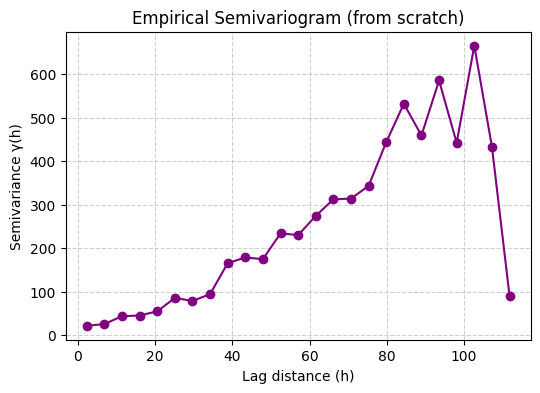

In [12]:
n_points = 50

# Define lag width
max_dist = np.max(distances)

num_bins = n_points/2
# num_bins = n_points/5 # comment out the line above to run this line

bins = np.linspace(0, max_dist, int(num_bins)+1) # Convert num_bins to an integer

# Average semivariances per bin
bin_centers = []
gamma_means = []

distances = distances1
semivariances = semivariances1

# distances = distances2
# semivariances = semivariances2

for k in range(int(num_bins)): # Convert num_bins to an integer for the loop as well
    mask = (distances >= bins[k]) & (distances < bins[k+1])
    if np.any(mask):
        bin_centers.append((bins[k] + bins[k+1]) / 2)
        gamma_means.append(np.mean(semivariances[mask]))

bin_centers = np.array(bin_centers)
gamma_means = np.array(gamma_means)


## And Plot

plt.figure(figsize=(6,4))
plt.plot(bin_centers, gamma_means, 'o-', color='purple', lw=1.5)
plt.title("Empirical Semivariogram (from scratch)")
plt.xlabel("Lag distance (h)")
plt.ylabel("Semivariance γ(h)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Now lets try the `z2`

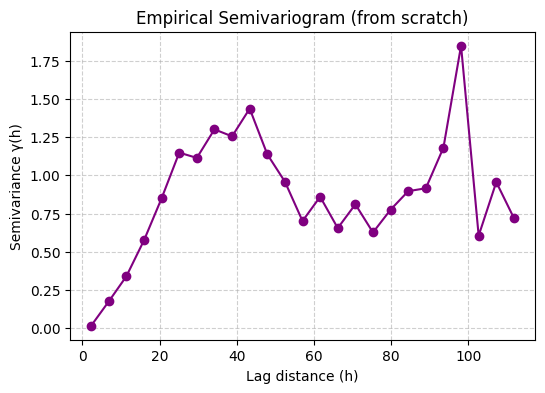

In [17]:
n_points = 50

# Define lag width
max_dist = np.max(distances)

num_bins = n_points/2
# num_bins = n_points/5 # comment out the line above to run this line

bins = np.linspace(0, max_dist, int(num_bins)+1) # Convert num_bins to an integer

# Average semivariances per bin
bin_centers = []
gamma_means = []

# distances = distances1
# semivariances = semivariances1

distances = distances2
semivariances = semivariances2

for k in range(int(num_bins)): # Convert num_bins to an integer for the loop as well
    mask = (distances >= bins[k]) & (distances < bins[k+1])
    if np.any(mask):
        bin_centers.append((bins[k] + bins[k+1]) / 2)
        gamma_means.append(np.mean(semivariances[mask]))

bin_centers = np.array(bin_centers)
gamma_means = np.array(gamma_means)


## And Plot

plt.figure(figsize=(6,4))
plt.plot(bin_centers, gamma_means, 'o-', color='purple', lw=1.5)
plt.title("Empirical Semivariogram (from scratch)")
plt.xlabel("Lag distance (h)")
plt.ylabel("Semivariance γ(h)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

You should also try varying the number of bins and see what happens...*Exercise*

Next- we will compare the output from this **empirical model** vs. the **theoretical model**

We would like to test for the goodness-of-fit of `spherical_model` as the theoretical, so we will write a function for it that will use $(h,nugget,sill,range)$ as inputs

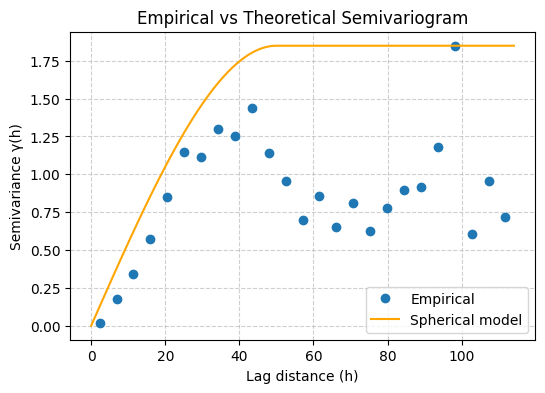

In [18]:
# Simple spherical model for illustration
def spherical_model(h, nugget, sill, range_):
    h = np.array(h)
    gamma = np.where(h < range_,
                     nugget + (sill - nugget) * (1.5*(h/range_) - 0.5*(h/range_)**3),
                     sill)
    return gamma

h_vals = np.linspace(0, max_dist, 100)
gamma_theoretical = spherical_model(h_vals, nugget=0.0, sill=np.max(gamma_means), range_=50)

plt.figure(figsize=(6,4))
plt.plot(bin_centers, gamma_means, 'o', label='Empirical')
plt.plot(h_vals, gamma_theoretical, '-', label='Spherical model', color='orange')
plt.title("Empirical vs Theoretical Semivariogram")
plt.xlabel("Lag distance (h)")
plt.ylabel("Semivariance γ(h)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Extra Credit: 10 Points**



*   Is this a good-fit? Test for goodness-of-fit, and explain your answer.
*    How can I have a better fit?

(Hint: We used sine and cosine for simulation- that are **periodic functions**)

Finally- Lets generate an interpolated heatmap for a 20x20 grid for both the empirical and theoretical(spherical) data, and see what the patterns actually look like..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --- Define spherical model (if not already defined) ---
def spherical_model(h, nugget, sill, range_):
    gamma = np.where(
        h <= range_,
        nugget + (sill - nugget) * (1.5 * (h / range_) - 0.5 * (h / range_)**3),
        sill
    )
    return gamma

# --- Example input data (if not defined earlier) ---
# These should already exist, but we’ll define placeholders for debugging
try:
    bin_centers, gamma_means
except NameError:
    bin_centers = np.linspace(0, 100, 12)
    gamma_means = 20 * (1 - np.exp(-bin_centers / 30)) + np.random.normal(0, 1, len(bin_centers))
    max_dist = np.max(bin_centers)

# --- Define model parameters (make sure these exist) ---
nugget = 0.0
sill = np.max(gamma_means)
range_ = 50.0

# --- Create grid ---
grid_x, grid_y = np.meshgrid(
    np.linspace(0, max_dist, 20),
    np.linspace(0, max_dist, 20)
)
grid_h = np.sqrt(grid_x**2 + grid_y**2)

# --- Interpolate empirical data to grid ---
# The issue: griddata expects points as (n, D) array — not two 1D arrays.
# You can’t pass (grid_h, zeros_like(grid_h)) because grid_h is 2D.
# Instead, interpolate over 1D distances (bin_centers) onto h-values flattened.
gamma_emp_interp_flat = griddata(
    points=bin_centers[:, None],          # shape (n,1)
    values=gamma_means,
    xi=grid_h.ravel()[:, None],           # flatten grid_h and reshape to (m,1)
    method='linear',
    fill_value=np.nan
)

# Reshape interpolated values back into 2D
gamma_emp_interp = gamma_emp_interp_flat.reshape(grid_h.shape)

# --- Theoretical spherical model ---
gamma_spherical = spherical_model(grid_h, nugget, sill, range_)

Now- Lets plot heatmaps to compare empirical vs spherical.

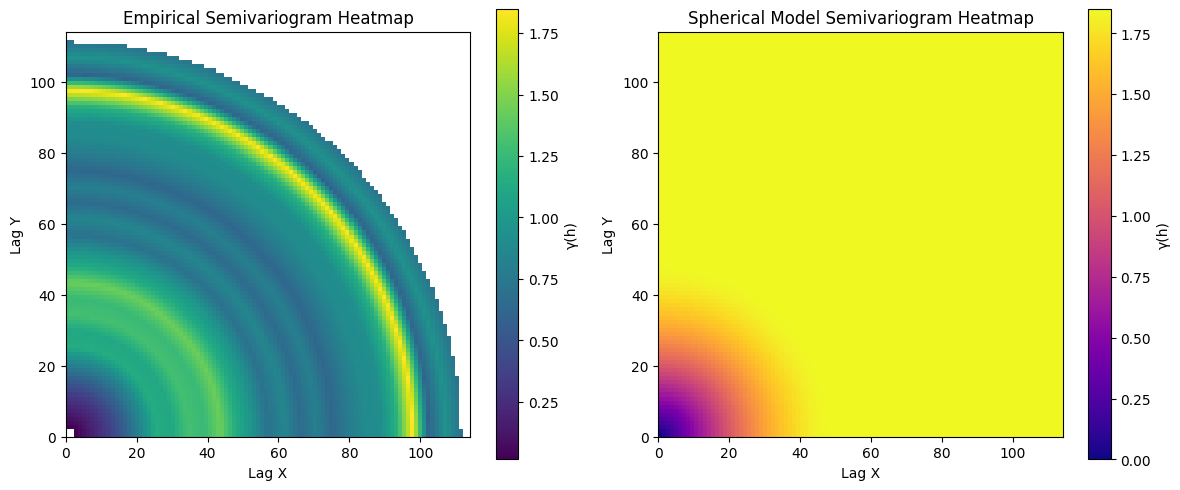

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Empirical heatmap
im0 = axes[0].imshow(gamma_emp_interp, origin='lower', cmap='viridis',
                     extent=[0, max_dist, 0, max_dist])
axes[0].set_title("Empirical Semivariogram Heatmap")
axes[0].set_xlabel("Lag X")
axes[0].set_ylabel("Lag Y")
fig.colorbar(im0, ax=axes[0], label="γ(h)")

# Theoretical heatmap
im1 = axes[1].imshow(gamma_spherical, origin='lower', cmap='plasma',
                     extent=[0, max_dist, 0, max_dist])
axes[1].set_title("Spherical Model Semivariogram Heatmap")
axes[1].set_xlabel("Lag X")
axes[1].set_ylabel("Lag Y")
fig.colorbar(im1, ax=axes[1], label="γ(h)")

plt.tight_layout()
plt.show()

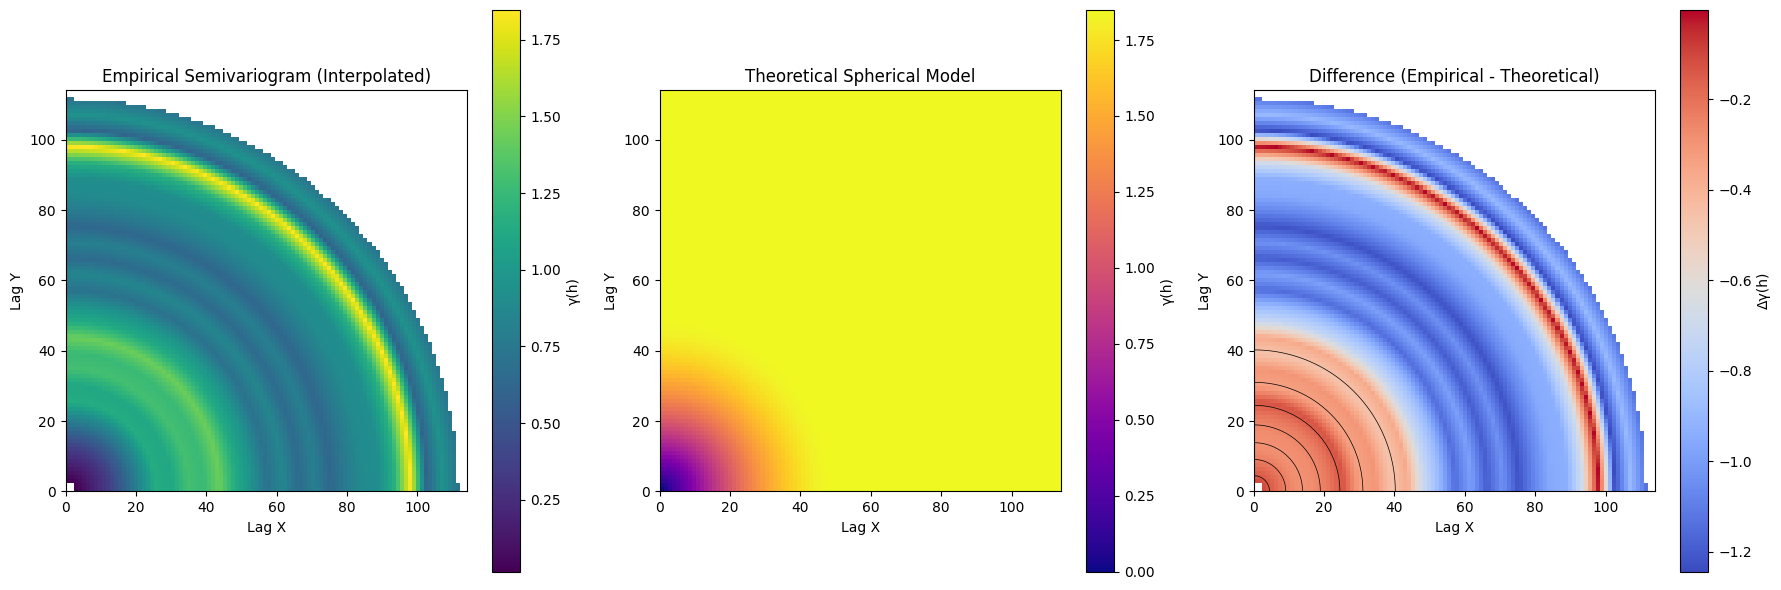

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --- Define spherical model ---
def spherical_model(h, nugget, sill, range_):
    gamma = np.where(
        h <= range_,
        nugget + (sill - nugget) * (1.5 * (h / range_) - 0.5 * (h / range_)**3),
        sill
    )
    return gamma

# --- Dummy data if not already defined ---
try:
    bin_centers, gamma_means, max_dist
except NameError:
    np.random.seed(42)
    bin_centers = np.linspace(0, 100, 12)
    gamma_means = 20 * (1 - np.exp(-bin_centers / 30)) + np.random.normal(0, 1, len(bin_centers))
    max_dist = np.max(bin_centers)

# --- Parameters for the spherical model ---
nugget = 0.0
sill = np.max(gamma_means)
range_ = 50.0

# --- Create grid ---
grid_x, grid_y = np.meshgrid(
    np.linspace(0, max_dist, 100),
    np.linspace(0, max_dist, 100)
)
grid_h = np.sqrt(grid_x**2 + grid_y**2)

# --- Interpolate empirical γ(h) onto grid ---
gamma_emp_interp_flat = griddata(
    points=bin_centers[:, None],
    values=gamma_means,
    xi=grid_h.ravel()[:, None],
    method='linear',
    fill_value=np.nan
)
gamma_emp_interp = gamma_emp_interp_flat.reshape(grid_h.shape)

# --- Theoretical spherical model ---
gamma_spherical = spherical_model(grid_h, nugget, sill, range_)

# --- Difference (Residual) map ---
gamma_diff = gamma_emp_interp - gamma_spherical

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# (1) Empirical
im0 = axes[0].imshow(gamma_emp_interp, origin='lower', cmap='viridis',
                     extent=[0, max_dist, 0, max_dist])
axes[0].set_title("Empirical Semivariogram (Interpolated)")
axes[0].set_xlabel("Lag X")
axes[0].set_ylabel("Lag Y")
fig.colorbar(im0, ax=axes[0], label="γ(h)")

# (2) Theoretical
im1 = axes[1].imshow(gamma_spherical, origin='lower', cmap='plasma',
                     extent=[0, max_dist, 0, max_dist])
axes[1].set_title("Theoretical Spherical Model")
axes[1].set_xlabel("Lag X")
axes[1].set_ylabel("Lag Y")
fig.colorbar(im1, ax=axes[1], label="γ(h)")

# (3) Difference (Residual)
im2 = axes[2].imshow(gamma_diff, origin='lower', cmap='coolwarm',
                     extent=[0, max_dist, 0, max_dist])
axes[2].contour(grid_x, grid_y, gamma_spherical, colors='k', linewidths=0.5)
axes[2].set_title("Difference (Empirical - Theoretical)")
axes[2].set_xlabel("Lag X")
axes[2].set_ylabel("Lag Y")
fig.colorbar(im2, ax=axes[2], label="Δγ(h)")

plt.tight_layout()
plt.show()
